# Importing all the required libraries

In [53]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Reading the dateset  

In [55]:
##loading dataset
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [57]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [59]:
df.shape

(25, 2)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [63]:
##give statistical description
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [66]:
##checking for null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Visualize the data

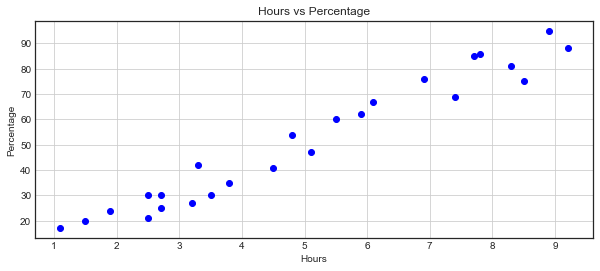

In [69]:
##plot the score distribution
plt.figure(figsize=(10,4))
plt.scatter(df.Hours,df.Scores,color='blue')
plt.title('Hours vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.grid()
plt.show()

# Plotting the heatmap of the data

In [70]:
corr = df.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


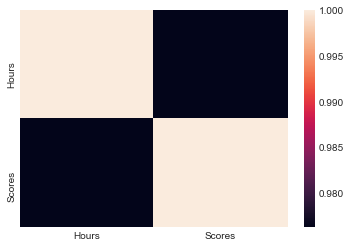

In [71]:
sns.heatmap(corr)

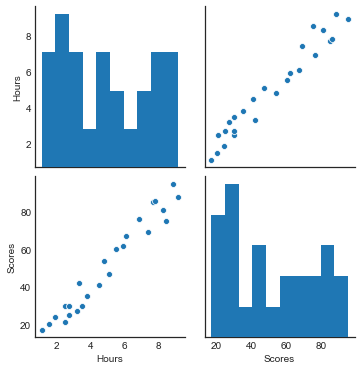

In [72]:
plt.style.use('seaborn-white')
sns.pairplot(df)

# Preparing the data 

In [73]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

# Splitting the data 

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


# Training and plotting the model

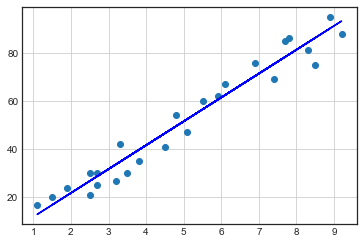

In [89]:
lreg = LinearRegression()
lreg.fit(X_train,y_train)
line = lreg.coef_*X+lreg.intercept_
plt.scatter(X,y)
plt.plot(X,line,color='blue')
plt.grid()
plt.show()

# Predict the score 

In [77]:
y_pred  = lreg.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


# Compare the actual and predicted 

In [78]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})  
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Text(0, 0.5, 'Scores')

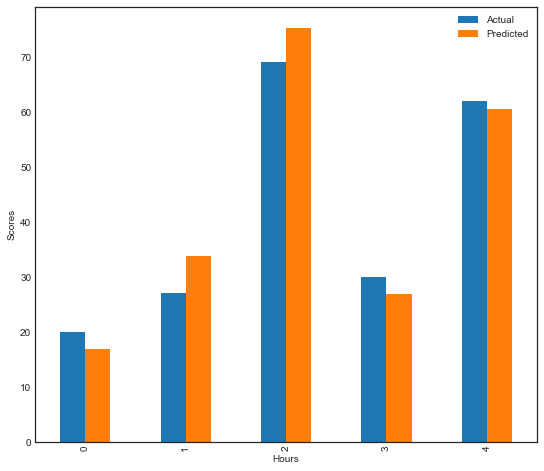

In [98]:
#ploting the actual and predicted values
df1.plot(kind='bar',figsize=(9,8))
plt.xlabel('Hours')
plt.ylabel('Scores')

# Testing new data point

In [91]:
hours=[[8.75],[7.0]]
score = lreg.predict(hours)
score

array([88.73640425, 71.39275541])

# Accuracy of our model

In [79]:
lreg.score(X_test,y_test)

0.9454906892105355

# Performance Measure (MAE,MSE,RMSE)

In [95]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.18385989900298
Mean squared error: 21.598769307217413
Root Mean squared error: 4.647447612100368


# Predicting the score of student studying 9.25 hours

In [81]:
study_hour=9.25
Prediction_score=lreg.predict([[study_hour]]).round(2)
print('Predicted score if a student study for 9.25 hours in a day :',Prediction_score)

Predicted score if a student study for 9.25 hours in a day : [93.69]
